In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

In [2]:
# загружаем датасет
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
A = boston_data.drop('PRICE', axis=1)
y = boston_data[['PRICE']]

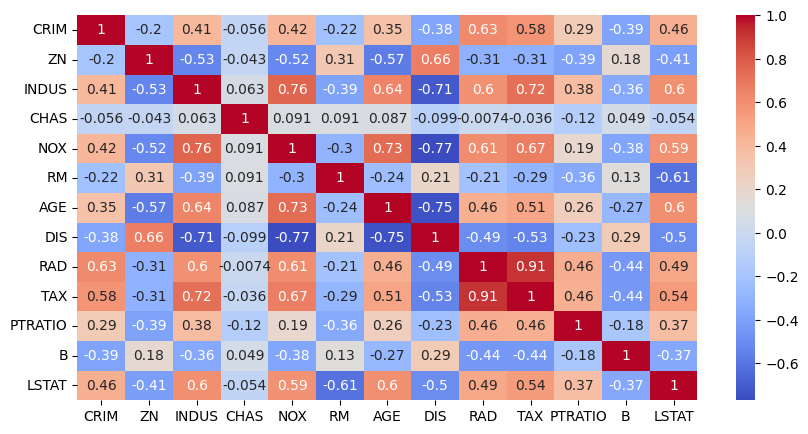

In [4]:
C = A.corr()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(C, annot=True, cmap='coolwarm');

In [5]:
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(C)
print('Собственные числа: \n', eig_values)
#print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


In [6]:
# считаем матрицу Грамма L^T*L:
print(np.round(eig_vectors.T @ eig_vectors, 2))

[[ 1. -0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.]
 [-0.  1. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0.]
 [ 0. -0.  1. -0.  0.  0. -0.  0. -0.  0.  0.  0. -0.]
 [ 0.  0. -0.  1.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
 [ 0.  0.  0.  0.  1. -0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0.  1.  0.  0. -0. -0.  0.  0.  0.]
 [-0. -0. -0.  0.  0.  0.  1. -0. -0.  0. -0.  0.  0.]
 [-0. -0.  0.  0.  0.  0. -0.  1.  0. -0.  0. -0. -0.]
 [-0. -0. -0.  0.  0. -0. -0.  0.  1. -0. -0. -0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0. -0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  1. -0. -0.]
 [ 0.  0.  0. -0.  0.  0.  0. -0. -0.  0. -0.  1. -0.]
 [ 0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0. -0.  1.]]


In [13]:
# создадим вырожденную матрицу А
A = np.array([
    [1, 4, 13],
    [3, -4, 7],
    [5, 9, 12]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', np.round(eig_values, 0))


Собственные числа: 
 [20. -4. -7.]


In [9]:
A.T@A

array([[186,  78, 197],
       [ 78,  74,  63],
       [197,  63, 250]])

In [15]:
# создадим вырожденную матрицу А
A = np.array([
    [1, 9, 4],
    [9, 4, 7],
    [4, 7, 12]
]).T

G = A.T@A
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(G)
print('Собственные числа: \n', np.round(eig_values, 0))


Собственные числа: 
 [391.  46.  16.]
